# CloudSat

CloudSat products can be downloaded by using the ``download`` method of the corresponding product object. For this example we will have a look a the radar reflectivity contained in the 2B-GEOPROF product.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from datetime import datetime
t_0 = datetime(2016, 11, 21, 10)
t_1 = datetime(2016, 11, 21, 12)

The variable ``files`` now contains the downloaded files. Now we only need to decipher the data format and extract the data of interest.

## L1B CPR

In [2]:
from pansat.products.satellite.cloud_sat import l1b_cpr

TypeError: Can't instantiate abstract class CloudSatProduct with abstract methods get_granules, get_spatial_coverage, get_temporal_coverage, open_granule

In [3]:
dir(l1b_cpr)

NameError: name 'l1b_cpr' is not defined

In [4]:
from pansat.download.accounts import add_identity, get_identity, delete_identity

In [5]:
from pathlib import Path 
destination = Path('/home/kukulies/projects/collocations/CLOUDSAT.hdf5')

In [59]:
from ftplib import FTP 
user, password = get_identity("Icare")
base_url = 'ftp.icare.univ-lille1.fr'

path = 'SPACEBORNE/CLOUDSAT//2B-CLDCLASS-LIDAR.v05.03/2011/2011_02_08/'
filename = '2011039003328_25436_CS_2B-CLDCLASS-LIDAR_GRANULE_P1_R05_E03_F00.hdf'

with FTP(base_url) as ftp:
    ftp.login(user=user, passwd=password)
    ftp.cwd(path)
    with open(destination, "wb") as file:
        ftp.retrbinary("RETR " + filename, file.write)

In [7]:
help(l1b_cpr.download) 

AttributeError: 'CloudSatProduct' object has no attribute 'download'

In [65]:
auth = get_identity('Icare') 
print(auth) 

('kukulies', 'strolchi1')


In [8]:
files_l1b = l1b_cpr.download(t_0, t_1)
dataset = l1b_cpr.open(files_l1b[0])
display(dataset)

AttributeError: 'str' object has no attribute 'filename'

Text(0.0, 1.0, '(a) L1B-CPR')

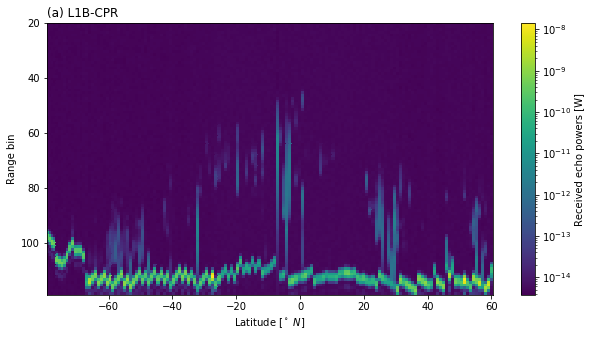

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

start = 10000
end = 25000
stride = 100
pwrs = dataset["received_echo_powers"][start:end:stride, 20:120]
lats = dataset["latitude"][start:end:stride]
bins = dataset["bins"][20:120]

plt.figure(figsize=(10, 5))
plt.pcolormesh(lats, bins, pwrs.T, norm=LogNorm())
plt.colorbar(label="Received echo powers [W]")
plt.gca().invert_yaxis()
plt.xlabel(r"Latitude [$^\circ\ N$]")
plt.ylabel("Range bin");
plt.title("(a) L1B-CPR", loc="left")

In [4]:
pwrs.attrs

{'unit': 'W',
 'description': 'Echo Power is the calibrated range gate power in watts, made in-flight and averaged.'}

## L2B GEOPROF

In [5]:
from pansat.products.satellite.cloud_sat import l2b_geoprof
files_l2b = l2b_geoprof.download(t_0, t_1)
dataset = l2b_geoprof.open(files_l2b[0])
display(dataset)

<xarray.Dataset>
Dimensions:             (bins: 125, rays: 37081)
Coordinates:
  * rays                (rays) int64 0 1 2 3 4 ... 37076 37077 37078 37079 37080
  * bins                (bins) int64 0 1 2 3 4 5 6 ... 119 120 121 122 123 124
    latitude            (rays) float64 -0.008771 -0.01844 ... 0.01022 0.0005542
    longitude           (rays) float64 -141.5 -141.5 -141.5 ... -166.2 -166.2
    time_since_start    (rays) float64 0.0 0.16 0.32 ... 5.933e+03 5.933e+03
    height              (rays, bins) int16 -9999 -9999 -9999 ... -9999 -9999
Data variables:
    radar_reflectivity  (rays, bins) int16 -8888 -8888 -8888 ... -8888 -8888

/home/simon/build/anaconda3/lib/python3.7/site-packages/xarray/core/dataarray.py:1897: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  return self.transpose()


Text(0.0, 1.0, '(b) L2B-GEOPROF')

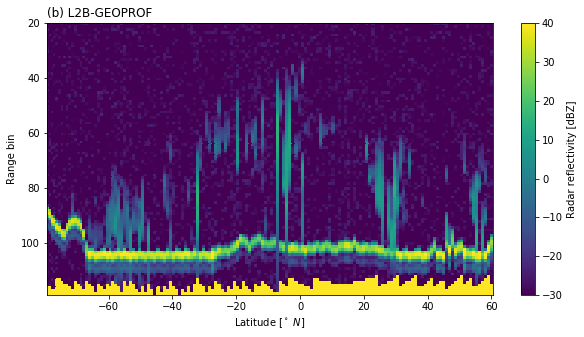

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

start = 10000
end = 25000
stride = 100
z = dataset["radar_reflectivity"][start:end:stride, 20:120] / 100.0
lats = dataset["latitude"][start:end:stride]
bins = dataset["bins"][20:120]

plt.figure(figsize=(10, 5))
plt.pcolormesh(lats, bins, z.T, norm=Normalize(-30, 40))
plt.colorbar(label="Radar reflectivity [dBZ]")
plt.gca().invert_yaxis()
plt.xlabel(r"Latitude [$^\circ\ N$]")
plt.ylabel("Range bin");
plt.title("(b) L2B-GEOPROF", loc="left")

## L2B CLDCLASS

In [11]:
from pansat.products.satellite.cloud_sat import l2b_cldclass
files = l2b_cldclass.download(t_0, t_1)
dataset = l2b_cldclass.open(files[0])
display(dataset)

<xarray.Dataset>
Dimensions:             (bins: 125, rays: 37081)
Coordinates:
  * rays                (rays) int64 0 1 2 3 4 ... 37076 37077 37078 37079 37080
  * bins                (bins) int64 0 1 2 3 4 5 6 ... 119 120 121 122 123 124
    latitude            (rays) float64 -0.008771 -0.01844 ... 0.01022 0.0005542
    longitude           (rays) float64 -141.5 -141.5 -141.5 ... -166.2 -166.2
    time_since_start    (rays) float64 0.0 0.16 0.32 ... 5.933e+03 5.933e+03
Data variables:
    cloud_class_flag    (rays, bins) int16 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    cloud_class         (rays, bins) int16 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    land_sea_flag       (rays, bins) int16 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2
    latitude_flag       (rays, bins) int16 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    algorithm_flag      (rays, bins) int16 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    quality_flag        (rays, bins) int16 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    precipitation_flag  (rays, bins) int16 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0

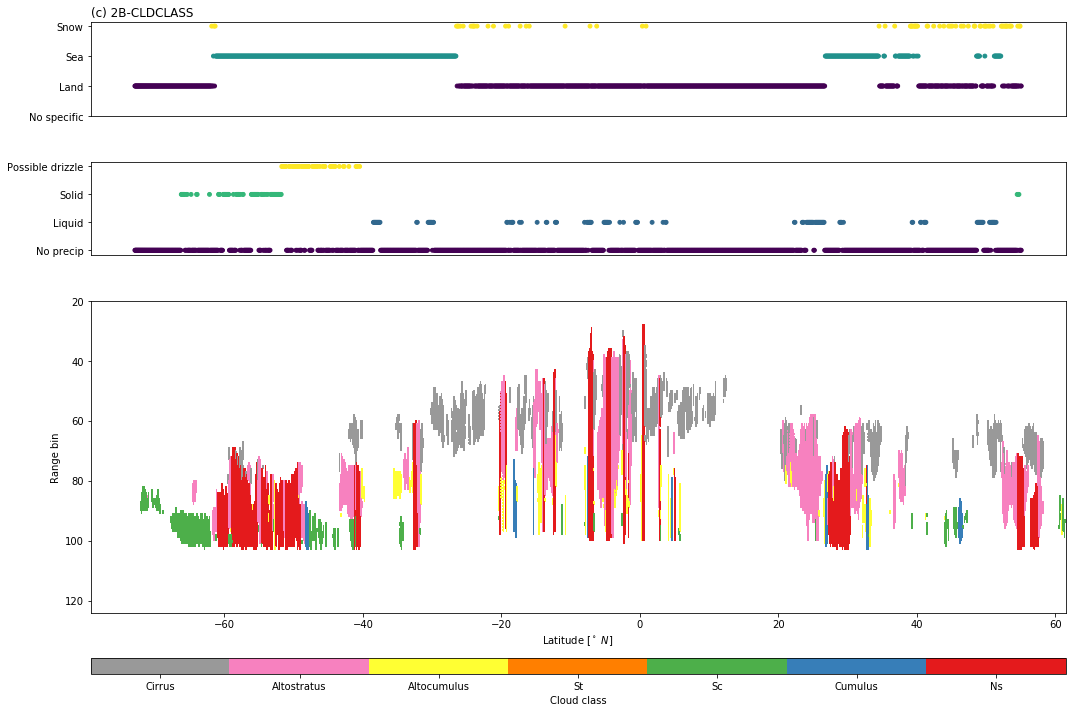

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm
import numpy as np

start = 10000
end = 25000
stride = 10
lats = dataset["latitude"][start:end:stride].data.astype(float)
bins = dataset["bins"][20:].data.astype(float)
cloud_class = dataset["cloud_class"][start:end:stride, 20:].data.astype(float)
cloud_class_flag = dataset["cloud_class_flag"][start:end:stride, 20:].data.astype(float)
cloud_class[cloud_class_flag == 0] = np.nan
precip = dataset["precipitation_flag"][start:end:stride, -1].data.astype(float)
ls_flag = dataset["land_sea_flag"][start:end:stride, -1].data.astype(float)

f = plt.figure(figsize=(15, 10))
gs = GridSpec(4, 1, height_ratios = [0.3, 0.3, 1.0, 0.05])

#
# Surface flag
#
ax = plt.subplot(gs[0])
ax.scatter(lats, ls_flag, c=ls_flag, s=15)
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(["No specific", "Land", "Sea", "Snow"])
ax.set_xticks([])
ax.set_title("(c) 2B-CLDCLASS", loc="left")

#
# Precipitaiton flag
#
ax = plt.subplot(gs[1])
ax.scatter(lats, precip, c=precip, s=15)
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(["No precip", "Liquid", "Solid", "Possible drizzle"])
ax.set_xticks([])

#
# Cloud classes
#
ax = plt.subplot(gs[2])
sm = ax.pcolormesh(lats, bins, cloud_class.T, cmap=cm.get_cmap("Set1_r", 7))
ax.invert_yaxis()
ax.set_xlabel(r"Latitude [$^\circ\ N$]")
ax.set_ylabel("Range bin");

ax = plt.subplot(gs[3])
ticks = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]
plt.colorbar(sm, cax=ax, label="Cloud class", orientation="horizontal", ticks=ticks)
ax.set_xticklabels( ["Cirrus", "Altostratus", "Altocumulus", "St", "Sc", "Cumulus", "Ns", "Deep Convection"])
plt.tight_layout()